In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# read in data and remove liquids
dfData=pd.read_csv('../data.csv',index_col='index')
dfData.drop(dfData[dfData['type']==3].index,inplace=True)
dfData.reset_index(inplace=True, drop=True)

# prepare variables
sampleValues={}
order=['non-supplemented','Inulin (Orafti®GR)','Nutriose FM06', 'FST 00007 KaroPRO 1-26', 'FST 00018 KaroPRO SG', 'Pea fiber 50 M', 'FST 00224 ApplePRO 60+',
       'Ceamfibre 7000', 'Vitacel WF200', 'Microcrystalline cellulose']
seriesID=dfData.Supplement.to_list()
dfDataBiscuits=dfData.copy()
dfDataBiscuits=dfDataBiscuits.drop(dfDataBiscuits[dfDataBiscuits['Water'] > 0.5].index)
dfDataBiscuits.reset_index(inplace=True)
dfDataCustards=dfData.copy()
dfDataCustards=dfDataCustards.drop(dfDataCustards[dfDataCustards['Water'] < 0.5].index)
dfDataCustards.reset_index(inplace=True)
dfDataCustards["Supplement"]=pd.Categorical(dfDataCustards['Supplement'], order)
dfDataCustards=dfDataCustards.sort_values(by='Supplement')
dfDataCustards["Supplement"]=dfDataCustards["Supplement"].astype(str)
dfDataBiscuits["Supplement"]=pd.Categorical(dfDataBiscuits['Supplement'], order)
dfDataBiscuits=dfDataBiscuits.sort_values(by='Supplement')
dfDataBiscuits["Supplement"]=dfDataBiscuits["Supplement"].astype(str)

In [22]:
#################### BISCUITS
seriesID=dfDataBiscuits.Supplement.to_list()
sampleValues={}
for i in np.unique(seriesID):
    sampleIndexes=[z for z in range(len(seriesID)) if seriesID[z] == i]
    sampleValues[i]=list(dfDataBiscuits['bioaccessibility'].loc[sampleIndexes].astype('float'))

fvalue, pvalue = stats.f_oneway(*sampleValues.values())
print(pvalue)
bioaccessibilities=[]
groups=[]
for key,bios in sampleValues.items():
     bioaccessibilities+=[i for i in bios]
     groups+=[key]*len(bios)

if pvalue<0.05:
    print("Significant differences!")
    tukey = pairwise_tukeyhsd(endog=bioaccessibilities,
                        groups=groups,
                        alpha=0.05)
    print(tukey)
    tukeydf = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

tukeyInput=pd.DataFrame({'groups':groups,'bioaccessibility':bioaccessibilities})
median_df= tukeyInput.groupby(['groups'])['bioaccessibility'].median().to_frame()
for row in median_df.index:
    median_df.loc[row, 'groups'] = str(row[0]) + "│" + str(row[1])
median_df.set_index('groups', drop = True, inplace = True)
tukeyInput['groups'] = tukeyInput['groups'].map(str)

#homocedasticity in biscuits
print(stats.levene(*list(sampleValues.values())).statistic)
biscuitValues=list(sampleValues.values())




6.242757914214281e-06
Significant differences!
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------
            Ceamfibre 7000     FST 00007 KaroPRO 1-26   4.3092 0.6781  -3.2075 11.8259  False
            Ceamfibre 7000       FST 00018 KaroPRO SG   3.7682 0.8181  -3.7485 11.2849  False
            Ceamfibre 7000     FST 00224 ApplePRO 60+  -1.2604 0.9998  -8.1221  5.6014  False
            Ceamfibre 7000         Inulin (Orafti®GR)  -5.3541 0.2568 -12.2159  1.5077  False
            Ceamfibre 7000 Microcrystalline cellulose  -6.3156 0.1735 -13.8323  1.2011  False
            Ceamfibre 7000              Nutriose FM06   2.4453 0.9858  -5.0714   9.962  False
            Ceamfibre 7000             Pea fiber 50 M   3.0529 0.9407  -4.4637 10.5696  False
            C

In [23]:
#################### CUSTARDS
seriesID=dfDataCustards.Supplement.to_list()
sampleValues={}
for i in np.unique(seriesID):
    sampleIndexes=[z for z in range(len(seriesID)) if seriesID[z] == i]
    sampleValues[i]=list(dfDataCustards['bioaccessibility'].loc[sampleIndexes].astype('float'))

fvalue, pvalue = stats.f_oneway(*sampleValues.values())
print(pvalue)
bioaccessibilities=[]
groups=[]
for key,bios in sampleValues.items():
     bioaccessibilities+=[i for i in bios]
     groups+=[key]*len(bios)
if pvalue<0.05:
    print("Significant differences!")
    tukey = pairwise_tukeyhsd(endog=bioaccessibilities,
                        groups=groups,
                        alpha=0.05)
    print(tukey)
    tukeydf = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

tukeyInput=pd.DataFrame({'groups':groups,'bioaccessibility':bioaccessibilities})
median_df= tukeyInput.groupby(['groups'])['bioaccessibility'].median().to_frame()
for row in median_df.index:
    median_df.loc[row, 'groups'] = str(row[0]) + "│" + str(row[1])
median_df.set_index('groups', drop = True, inplace = True)
tukeyInput['groups'] = tukeyInput['groups'].map(str)

#homocedasticity in custards
print(stats.levene(*list(sampleValues.values())).statistic)
custardValues=list(sampleValues.values())

7.213931791618705e-05
Significant differences!


                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------
            Ceamfibre 7000     FST 00007 KaroPRO 1-26   1.9933 0.9819  -3.9606  7.9471  False
            Ceamfibre 7000       FST 00018 KaroPRO SG   1.5821 0.9965  -4.3717  7.5359  False
            Ceamfibre 7000     FST 00224 ApplePRO 60+   3.9935 0.4591  -1.9603  9.9473  False
            Ceamfibre 7000         Inulin (Orafti®GR)  -4.5701 0.2741  -10.524  1.3837  False
            Ceamfibre 7000 Microcrystalline cellulose  -3.5913 0.6074  -9.5452  2.3625  False
            Ceamfibre 7000              Nutriose FM06   0.7563    1.0  -4.6788  6.1914  False
            Ceamfibre 7000             Pea fiber 50 M   2.1554 0.9697  -3.7985  8.1092  False
            Ceamfibre 7000              Vitacel WF200  -3.61

In [24]:
#shapiro wilks
print(stats.shapiro([item for sublist in custardValues for item in sublist]))
print(stats.shapiro([item for sublist in biscuitValues for item in sublist]))
print(stats.shapiro([item for sublist in biscuitValues for item in sublist]+[item for sublist in custardValues for item in sublist]))



ShapiroResult(statistic=0.985969066619873, pvalue=0.7013376951217651)
ShapiroResult(statistic=0.9777808785438538, pvalue=0.2647784948348999)
ShapiroResult(statistic=0.9297778010368347, pvalue=4.26310725742951e-06)


In [25]:
#all homocedasticity
# Get the degrees of freedom
df_num = len(dfData['Supplement'].unique())*2-1
print(df_num)
df_den = len(dfData.index)-len(dfData['Supplement'].unique())*2
print(df_den)
stats.levene(*(biscuitValues+custardValues))

19
110


LeveneResult(statistic=1.0350299886888965, pvalue=0.42827682740216283)

                                 sum_sq     df            F        PR(>F)
Q("type")                  12396.712671    1.0  1341.706744  1.863410e-63
Q("Supplement")             1284.820214    9.0    15.450798  5.038636e-16
Q("type"):Q("Supplement")    403.557305    9.0     4.853039  1.809498e-05
Residual                    1016.346083  110.0          NaN           NaN


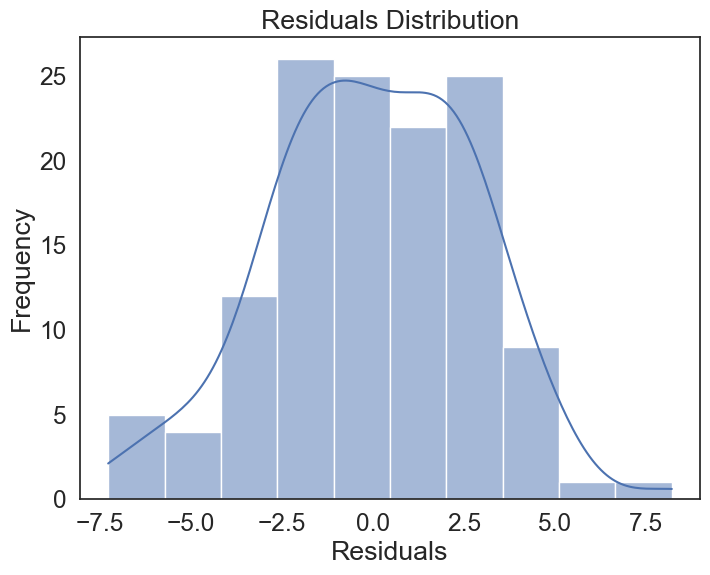

shapiro residuals
ShapiroResult(statistic=0.9914701581001282, pvalue=0.6147415637969971)


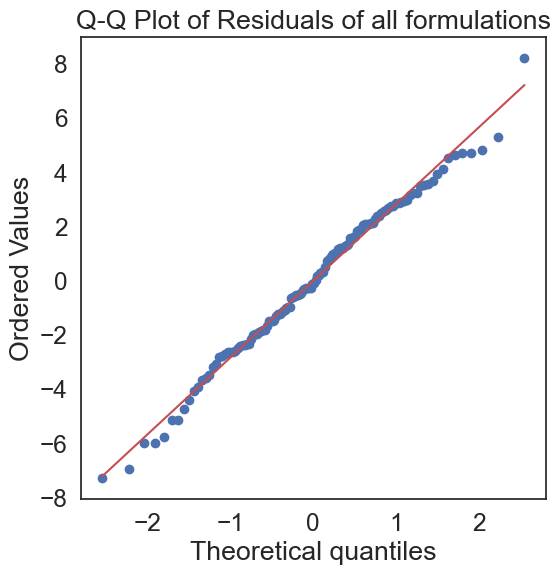

Oil_retention
0.8899825215339661
0.8861550688743591
Water_retention
0.8667998909950256
0.8670927882194519
Bulk_density
0.9319907426834106
0.937290608882904
Tapped_density
0.8779038190841675
0.9005156755447388
L
0.8098187446594238
0.7885477542877197
a
0.879977285861969
0.8828250169754028
b
0.886903703212738
0.8954543471336365
C
0.9044597148895264
0.9137223362922668
h
0.8039294481277466
0.7745989561080933
Curcumin_binding_capacity
0.8401095867156982
0.8303106427192688
Particle_size
0.8799885511398315
0.8907559514045715
Specific_surface_area
0.8556271195411682
0.8587178587913513
Biscuit_hardness
0.8855160474777222
0.8876893520355225
Custard_viscosity
0.8148486614227295
0.8171796202659607
Custard_firmness
0.9131476879119873
0.9117358326911926
Custard_stickiness
0.8679102063179016
0.8703916072845459
Cellulose
0.8463045358657837
0.8432493209838867
Hemicellulose
0.8184130191802979
0.8081340193748474
Dextrine
0.31926262378692627
0.4197055697441101
Pectin
0.672053337097168
0.6666343808174133
Li

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.api.types import is_numeric_dtype

#2 way anova
dfData['type'] = pd.cut(dfData['Water'], bins=[float('-Inf'), 0.5, float('Inf')], labels=[1,2])
model = ols('bioaccessibility ~ Q("type") + Q("Supplement") + Q("type"):Q("Supplement")', data=dfData).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Get the residuals from the model
residuals = model.resid

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Check the normality of residuals using Q-Q plot
print('shapiro residuals')
print(stats.shapiro(residuals))
residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals of all formulations')
plt.show()

#variable normality
from scipy import stats
shapiroCustards={}
for column in dfData.columns:
    if is_numeric_dtype(dfData[column]):
        print(column)
        print(stats.shapiro(dfData[dfData['Water']<0.5][column]).statistic)
        print(stats.shapiro(dfData[dfData['Water']>0.5][column]).statistic)

In [27]:
import pingouin as pg

# Perform two-way ANOVA
aov = pg.anova(data=dfData, dv='bioaccessibility', between=['type', 'Supplement'], detailed=True)
print(aov)

# Calculate effect sizes
eta_squared = aov['np2'][0]  # Partial eta-squared for Factor A
partial_eta_squared = aov['np2'][1]  # Partial eta-squared for Factor B
interaction_eta_squared = aov['np2'][2]  # Partial eta-squared for the interaction

# Print effect sizes
print(f"Partial eta-squared for Factor A: {eta_squared}")
print(f"Partial eta-squared for Factor B: {partial_eta_squared}")
print(f"Partial eta-squared for the interaction: {interaction_eta_squared}")

              Source            SS     DF            MS            F   
0               type  12396.712671    1.0  12396.712671  1341.706744  \
1         Supplement   1284.820214    9.0    142.757802    15.450798   
2  type * Supplement    403.557305    9.0     44.839701     4.853039   
3           Residual   1016.346083  110.0      9.239510          NaN   

          p-unc       np2  
0  1.863410e-63  0.924227  
1  5.038636e-16  0.558334  
2  1.809498e-05  0.284215  
3           NaN       NaN  
Partial eta-squared for Factor A: 0.9242271206496433
Partial eta-squared for Factor B: 0.5583343610730056
Partial eta-squared for the interaction: 0.2842146222135784


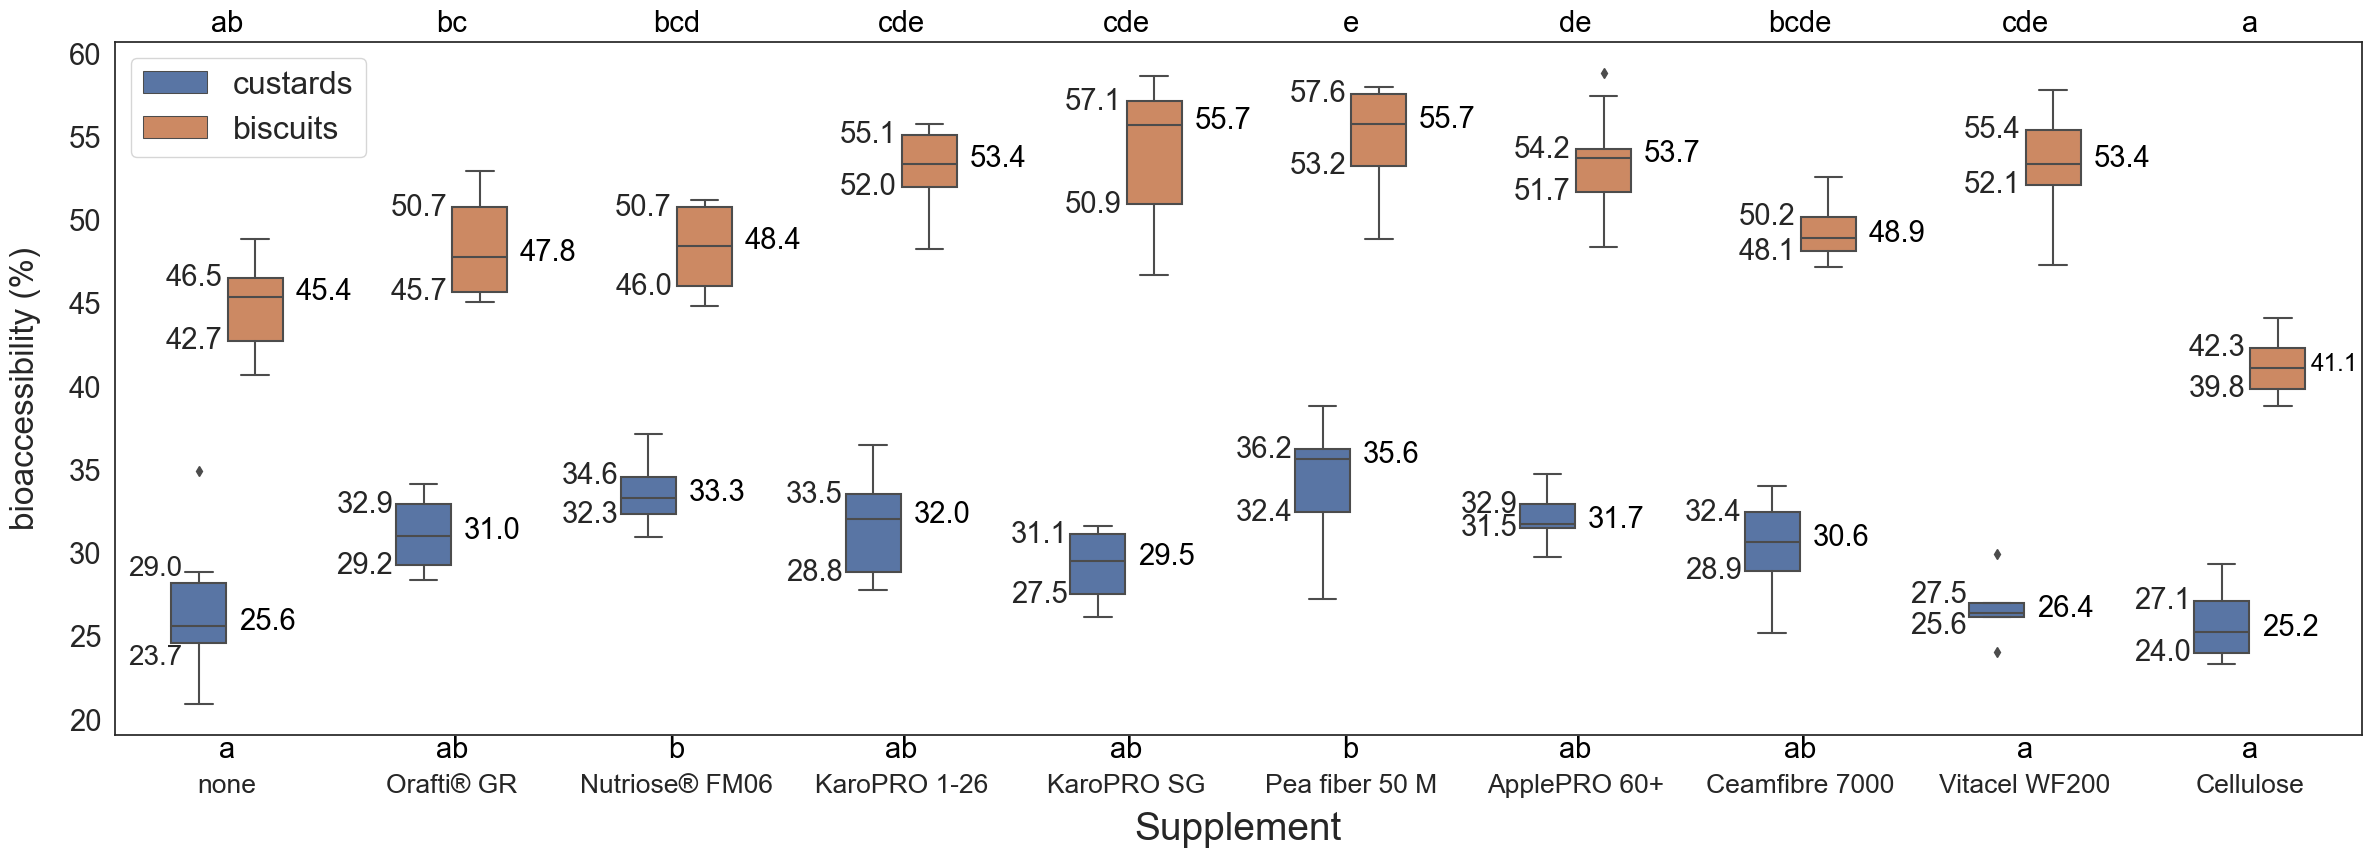

In [28]:
#################### ALL BOXPLOTS

# CLD values obtained from the separate R script
cldCustards={'Inulin (Orafti®GR)': 'ab', 'non-supplemented': 'a', 'Microcrystalline cellulose': 'a', 'Nutriose FM06': 'b', 'Ceamfibre 7000': 'ab', 'FST 00018 KaroPRO SG': 'ab', 'Vitacel WF200': 'a', 'FST 00007 KaroPRO 1-26': 'ab', 'FST 00224 ApplePRO 60+': 'ab', 'Pea fiber 50 M': 'b'}
cldBiscuits={'Inulin (Orafti®GR)': 'bc', 'non-supplemented': 'ab', 'Microcrystalline cellulose': 'a', 'Nutriose FM06': 'bcd', 'Ceamfibre 7000': 'bcde', 'FST 00018 KaroPRO SG': 'cde', 'Vitacel WF200': 'cde', 'FST 00007 KaroPRO 1-26': 'cde', 'FST 00224 ApplePRO 60+': 'de', 'Pea fiber 50 M': 'e'}

# CLD values obtained from the separate R script
cldCustards={'Inulin (Orafti®GR)': 'ab', 'non-supplemented': 'a', 'Microcrystalline cellulose': 'a', 'Nutriose FM06': 'b', 'Ceamfibre 7000': 'ab', 'FST 00018 KaroPRO SG': 'ab', 'Vitacel WF200': 'a', 'FST 00007 KaroPRO 1-26': 'ab', 'FST 00224 ApplePRO 60+': 'ab', 'Pea fiber 50 M': 'b'}
cldBiscuits={'Inulin (Orafti®GR)': 'bc', 'non-supplemented': 'ab', 'Microcrystalline cellulose': 'a', 'Nutriose FM06': 'bcd', 'Ceamfibre 7000': 'bcde', 'FST 00018 KaroPRO SG': 'cde', 'Vitacel WF200': 'cde', 'FST 00007 KaroPRO 1-26': 'cde', 'FST 00224 ApplePRO 60+': 'de', 'Pea fiber 50 M': 'e'}

sampleValues={}
for i in np.unique(seriesID):
    sampleIndexes=[z for z in range(len(seriesID)) if seriesID[z] == i]
    sampleValues[i]=list(dfData['bioaccessibility'].loc[sampleIndexes].astype('float'))

#CLD compact letter display later
fig, ax = plt.subplots()
fig.set_size_inches(29, 9.5)
ax.set_facecolor('white')
fig.set_edgecolor('black')
plt.rc('axes',edgecolor='black')
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"})
from matplotlib import colors as mcolors

colors=['gray','indianred','lightsalmon','peru','yellowgreen','lightseagreen','steelblue','slategrey','mediumpurple','orchid','khaki']
colors=[colors[i] for i in [7,3,2,5,6,0,9,8,4,10,1]]

df_cat = pd.concat([dfDataCustards, dfDataBiscuits])
df_cat['type'] = pd.cut(df_cat['Water'], bins=[float('-Inf'), 0.5, float('Inf')], labels=['biscuits','custards'])

box_width=0.5
df_cat.loc[df_cat['Supplement'].str.startswith('FST'),'Supplement']=df_cat[df_cat['Supplement'].str.startswith('FST')].Supplement.str[10:]

ax = sns.boxplot(x='Supplement', y='bioaccessibility', hue='type',hue_order=['custards','biscuits'], dodge=True, data=df_cat, width=box_width)#

#all together, courtesy of R
cldDict={i:[cldCustards[i],cldBiscuits[i]] for i in ['non-supplemented','Inulin (Orafti®GR)', 'Nutriose FM06','FST 00007 KaroPRO 1-26','FST 00018 KaroPRO SG','Pea fiber 50 M','FST 00224 ApplePRO 60+','Ceamfibre 7000','Vitacel WF200','Microcrystalline cellulose']}
ax.tick_params(labelsize=18)
i = 0
for name, group in dfDataCustards.groupby('Supplement',sort=False):
    Q1, Q3 = group['bioaccessibility'].quantile([0.25,0.75])
    if name=="non-supplemented":
        q1=True
        for q in (Q1-0.85, Q3+0.85):
            x = i-box_width/2+0.05
            y = q#-0.5 if q1 else q+0.5
            q1=False
            ax.annotate('%.1f' % q, (x,y),
                        xytext=(x, y), textcoords='data',
                        va='center', ha='right',fontsize=20)
    elif name=="Vitacel WF200":
        q1=True
        for q in (Q1-0.5, Q3+0.5):
            x = i-box_width/2-0.01
            y = round(q,1)#-0.5 if q1 else q+0.5
            q1=False
            ax.annotate('%.1f' % q, (x,y),
                        xytext=(x, y), textcoords='data',
                        va='center', ha='right',fontsize=21)
    else:
        q1=True
        for q in (Q1, Q3):
            x = i-box_width/2-0.01
            y = round(q,1)#-0.5 if q1 else q+0.5
            q1=False
            ax.annotate('%.1f' % q, (x,y),
                        xytext=(x, y), textcoords='data',
                        va='center', ha='right',fontsize=21)
    
    i+=1
i = 0
for name, group in dfDataBiscuits.groupby('Supplement',sort=False):
    Q1, Q3 = group['bioaccessibility'].quantile([0.25,0.75])
    q1=True
    for q in (Q1, Q3):
        x = i-box_width/2-0.01
        y = q#-0.5 if q1 else q+0.5
        q1=False
        ax.annotate('%.1f' % q, (x,y),
                    xytext=(x+box_width/2-0.01, y), textcoords='data',
                    va='center', ha='right',fontsize=21)
    
    i+=1


medians = dfDataCustards.groupby(['Supplement'],sort=False)['bioaccessibility'].median()
min = dfDataCustards.groupby(['Supplement'],sort=False)['bioaccessibility'].min()
q25 = dfDataCustards.groupby(['Supplement'],sort=False)['bioaccessibility'].quantile(0.25)
vertical_offset = dfDataCustards['bioaccessibility'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick+0.18,medians[xtick]-0.2,round(medians[xtick],1), 
            horizontalalignment='center',color='black',fontsize=21)
    ax.text(xtick,17.7,list(cldDict.values())[xtick][0], 
            horizontalalignment='center',color='black',fontsize=21)

medians = dfDataBiscuits.groupby(['Supplement'],sort=False)['bioaccessibility'].median()
min = dfDataBiscuits.groupby(['Supplement'],sort=False)['bioaccessibility'].min()
q75 = dfDataBiscuits.groupby(['Supplement'],sort=False)['bioaccessibility'].quantile(0.75)
vertical_offset = dfDataBiscuits['bioaccessibility'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    if xtick==9:
        ax.text(xtick+0.125+box_width/2,medians[xtick]-0.2,round(medians[xtick],1), 
            horizontalalignment='center',color='black',fontsize=17.5)
    else:
        ax.text(xtick+0.18+box_width/2,medians[xtick]-0.2,round(medians[xtick],1), 
            horizontalalignment='center',color='black',fontsize=21)
    ax.text(xtick,61.3,list(cldDict.values())[xtick][1], 
            horizontalalignment='center',color='black',fontsize=21)

plt.xlabel('Supplement',labelpad=10,fontsize=28)
plt.ylabel('bioaccessibility (%)',labelpad=20,fontsize=24)
plt.tick_params(axis='x', which='major', pad=22)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Orafti® GR'
labels[2] = 'Nutriose® FM06'
labels[9] = 'Cellulose'
labels[0] = 'none'

labelsy = [item.get_text() for item in ax.get_yticklabels()]
ax.set_xticklabels(labels, fontsize=19)
ax.tick_params(axis='y',labelsize=21)
ax.legend(loc=2, prop={'size': 23})


x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color="white", zorder=-1))
plt.subplots_adjust(bottom=0.15)
plt.savefig('boxplot.png', transparent=True, dpi=300)

In [29]:
#correlations
import scipy

dfData['MacronutrientContent']=dfData['Protein']+dfData['Fat']+dfData['Carbs']
cols=['Oil_retention', 'Water_retention', 'Bulk_density',
       'Tapped_density', 'Curcumin_binding_capacity',
       'Particle_size', 'Specific_surface_area', 'Biscuit_hardness',
       'Custard_viscosity', 'Custard_firmness', 'Custard_stickiness',
       'Cellulose', 'Hemicellulose', 'Dextrine', 'Pectin', 'Lignin',
       'Fructans', 'Insoluble_fibre', 'Soluble_fibre', 'Protein', 'Carbs',
       'Fat', 'Water', 'Ash', 'MacronutrientContent', 'type', 'bioaccessibility']

exportCols=['Oil_retention', 'Water_retention', 'Bulk_density',
       'Tapped_density', 'Curcumin_binding_capacity',
       'Particle_size', 'Specific_surface_area', 'Biscuit_hardness',
       'Custard_viscosity', 'Custard_firmness', 'Custard_stickiness',
       'Cellulose', 'Hemicellulose', 'Dextrine', 'Pectin', 'Lignin',
       'Fructans', 'Insoluble_fibre', 'Soluble_fibre', 'Protein', 'Carbs',
       'Fat', 'Water', 'Ash', 'MacronutrientContent']

supplementCols= ['Oil_retention', 'Water_retention', 'Bulk_density',
       'Tapped_density', 'Curcumin_binding_capacity',
       'Particle_size', 'Specific_surface_area', ]
contCols=['Protein', 'Carbs',
       'Fat', 'Water', 'Ash','MacronutrientContent']

tabledf=pd.DataFrame({},index=cols)
spearman=[]
spearmanP=[]
spearmanBisc=[]
spearmanPBisc=[]
spearmanCust=[]
spearmanPCust=[]

for feature in tabledf.index:
    dfTemp=dfData.copy()
    if feature in supplementCols:
        dfTemp.drop(dfTemp[dfTemp[feature]==0].index,inplace=True)
    elif feature in contCols:#non supplemented are considered to bias the correlation, has they have 0% supplementation
        dfTemp.drop(dfTemp[dfTemp['Supplement']=='non-supplemented'].index,inplace=True)
    #all
    spearman.append(scipy.stats.spearmanr(dfTemp[feature],dfTemp['bioaccessibility'])[0])
    spearmanP.append(scipy.stats.spearmanr(dfTemp[feature],dfTemp['bioaccessibility'])[1])
    #custards
    spearmanCust.append(scipy.stats.spearmanr(dfTemp[dfTemp['type']==2][feature],dfTemp[dfTemp['type']==2]['bioaccessibility'])[0])
    spearmanPCust.append(scipy.stats.spearmanr(dfTemp[dfTemp['type']==2][feature],dfTemp[dfTemp['type']==2]['bioaccessibility'])[1])
    #biscuits
    spearmanBisc.append(scipy.stats.spearmanr(dfTemp[dfTemp['type']==1][feature],dfTemp[dfTemp['type']==1]['bioaccessibility'])[0])
    spearmanPBisc.append(scipy.stats.spearmanr(dfTemp[dfTemp['type']==1][feature],dfTemp[dfTemp['type']==1]['bioaccessibility'])[1])

tabledf['spearman']=spearman
tabledf['spearmanP']=spearmanP

tabledf['spearmanCust']=spearmanCust
tabledf['spearmanCustP']=spearmanPCust

tabledf['spearmanBisc']=spearmanBisc
tabledf['spearmanBiscP']=spearmanPBisc

tabledf=tabledf.round(decimals=2)
table2df=tabledf.reindex(exportCols)



C:\Users\acast\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [30]:
for i in ['spearman','spearmanCust','spearmanBisc']:
    table2df[i+'*']=table2df[i].astype(str)
    table2df.loc[(table2df[i]<0),i+'*']=' '+table2df[(table2df[i]>0)][i].abs().astype(str)
    table2df.loc[(table2df[i]<0),i+'*']='–'+table2df[(table2df[i]<0)][i].abs().astype(str)    
    table2df.loc[(table2df[i+'P']<0.05)&(table2df[i+'P']>0.01),i+'*']=table2df[(table2df[i+'P']<0.05)&(table2df[i+'P']>0.01)][i+'*']+'*'
    table2df.loc[table2df[i+'P']<0.01,i+'*']=table2df[table2df[i+'P']<0.01][i+'*']+'**'

table2df[['spearman','spearman*','spearmanCust','spearmanCust*','spearmanBisc','spearmanBisc*']].to_csv('correlations.csv')


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
columnsModel=['Soluble_fibre','Hemicellulose','MacronutrientContent']
vif['variable'] = columnsModel
vif['VIF'] = [variance_inflation_factor(dfData[dfData['Water']>0.5][columnsModel].values, i) for i in range(dfData[dfData['Water']>0.5][columnsModel].shape[1])]
print(vif)
vif['variable'] = columnsModel
vif['VIF'] = [variance_inflation_factor(dfData[dfData['Water']<0.5][columnsModel].values, i) for i in range(dfData[dfData['Water']<0.5][columnsModel].shape[1])]
print(vif)


               variable       VIF
0         Soluble_fibre  2.318431
1         Hemicellulose  2.846483
2  MacronutrientContent  4.431522
               variable       VIF
0         Soluble_fibre  2.140434
1         Hemicellulose  2.897658
2  MacronutrientContent  4.278093


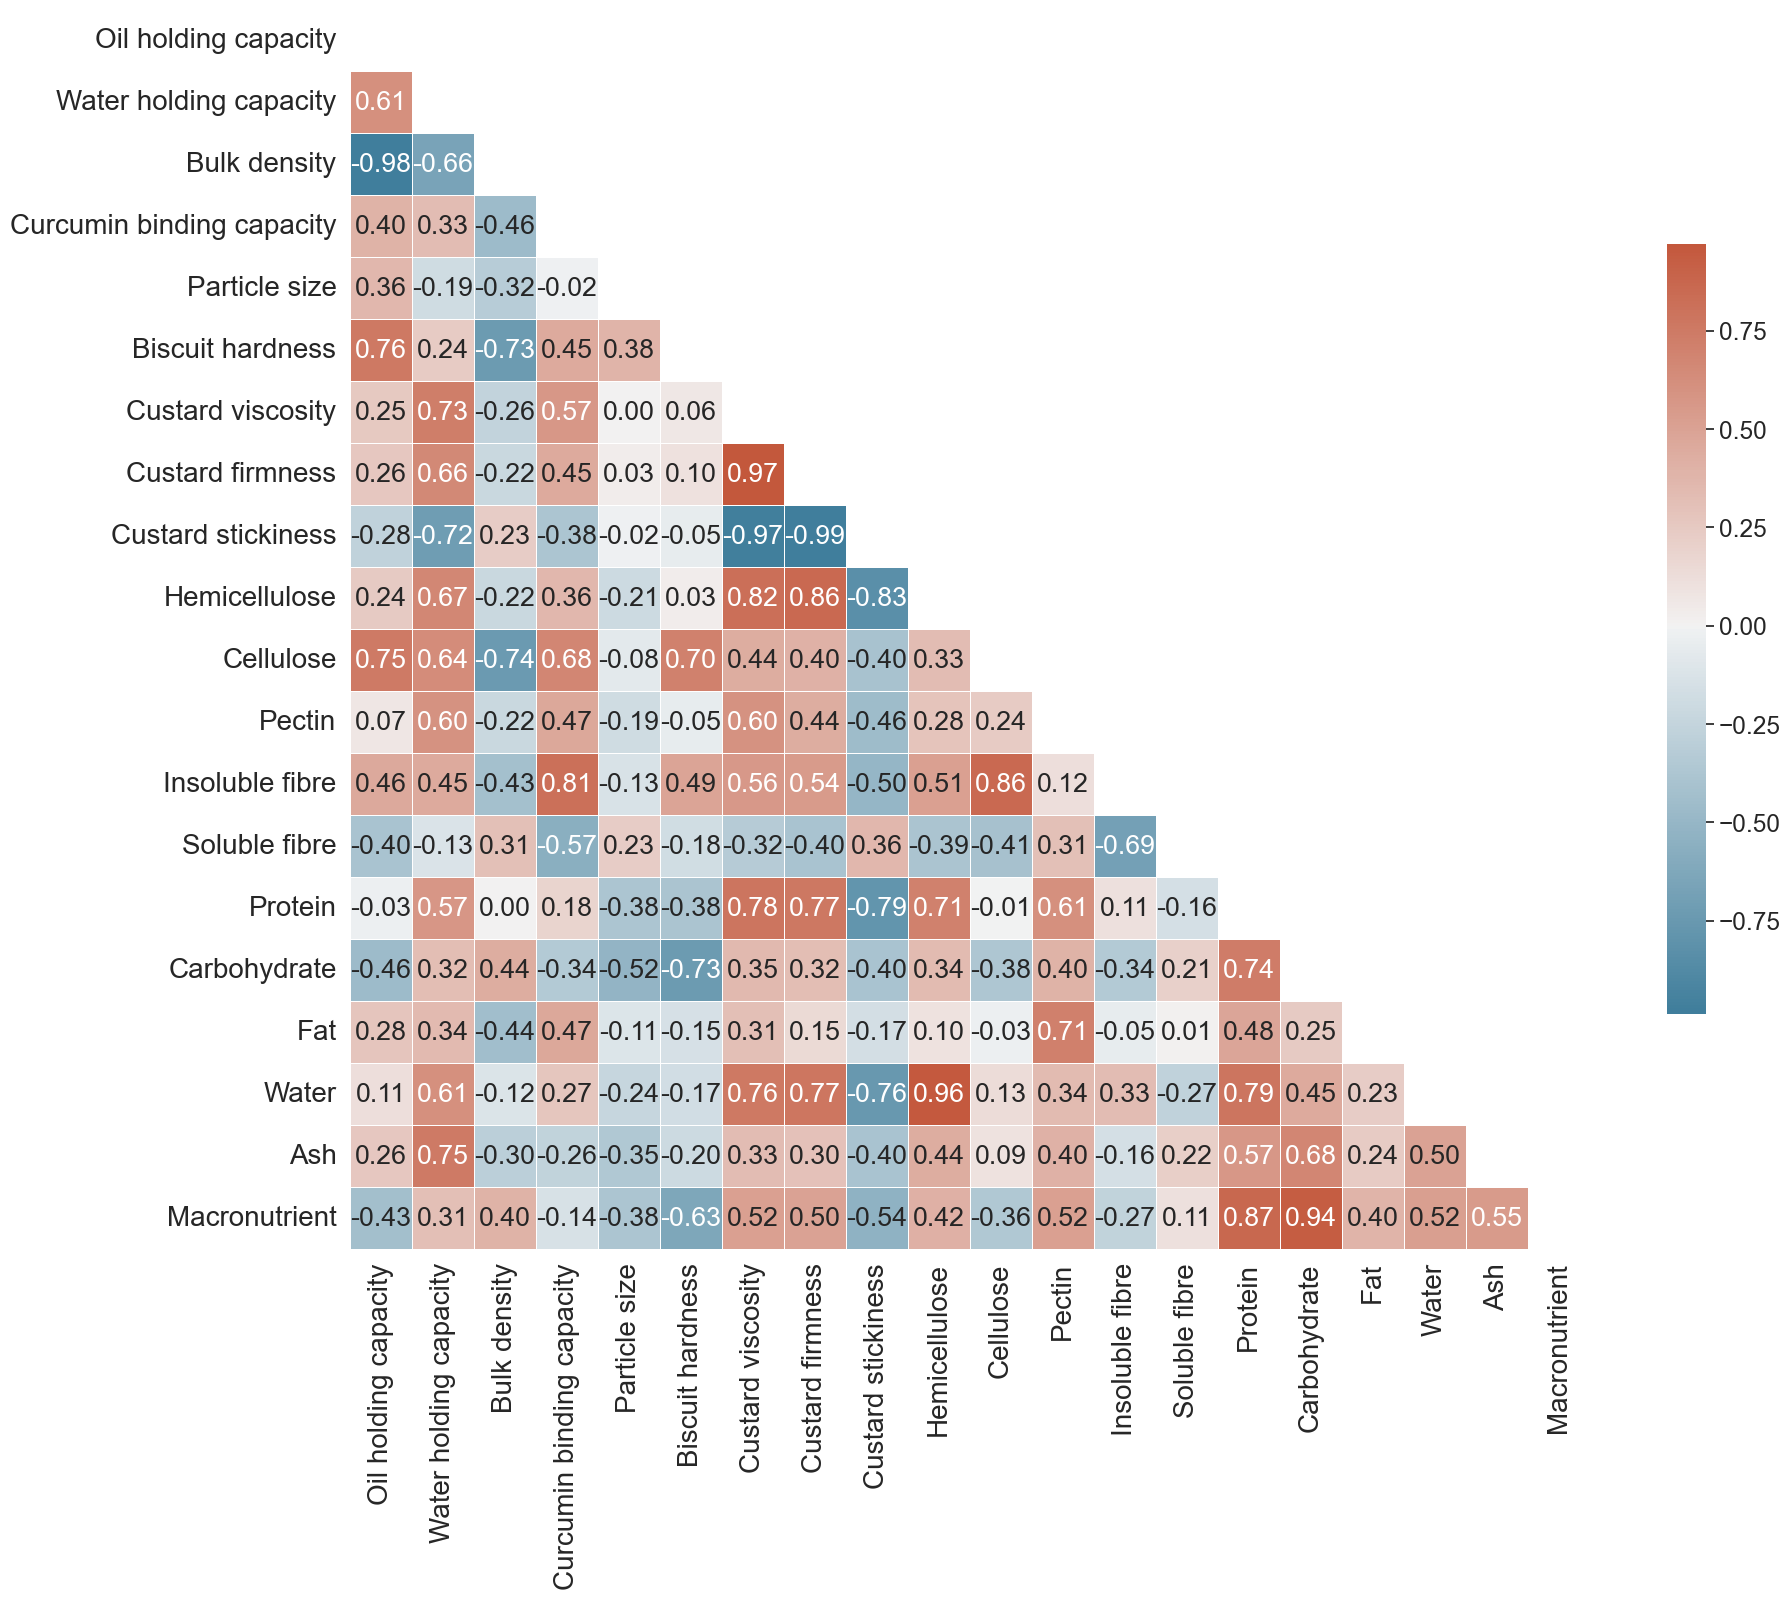

In [32]:
#correlation between features (not included in article)
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style='white', font_scale=1.6)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
dfCopy=dfData.copy()
dfCopy=dfCopy[exportCols]
renames={'Carbs':'Carbohydrate','Oil_retention':'Oil holding capacity', 'Water_retention': 'Water holding capacity',
'MacronutrientContent':'Macronutrient'}
renames2={i:i.replace("_"," ") for i in dfCopy.columns}

dfCopy.rename(columns=renames,inplace=True)
dfCopy.rename(columns=renames2,inplace=True)
dfCopy=dfCopy[dfCopy['Water']<0.5].groupby('Bulk density').mean().reset_index()
condition = (dfCopy['Bulk density'] == 0)
for col in ['Oil holding capacity', 'Water retention','Bulk density', 'Tapped density','Curcumin binding capacity','Particle size', 'Specific surface area']:
    dfCopy.loc[condition, col] = np.nan

from sklearn.feature_selection import mutual_info_regression

def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value

corr=dfCopy[['Oil holding capacity', 'Water holding capacity',
       'Bulk density','Curcumin binding capacity','Particle size',
       'Biscuit hardness','Custard viscosity','Custard firmness', 'Custard stickiness','Hemicellulose','Cellulose','Pectin', 'Insoluble fibre', 'Soluble fibre', 'Protein',
       'Carbohydrate', 'Fat', 'Water', 'Ash','Macronutrient']].corr(method='spearman')#custom_mi_reg or spearman
       #'Cellulose%','Hemicellulose%','Pectin%','Lignin%','Fructans%','Maltodextrine%',
mask = np.triu(np.ones_like(corr, dtype=bool))
ax=sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt = '.2f')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20)
plt.savefig('propertiesCorr.png', dpi=600, bbox_inches="tight")

specmean
26.70968452166667
4.35788757386961
0.9390197396278381
samplemean
30.86
4.286939467732196
0.8385802507400513
RanksumsResult(statistic=-1.0660035817780522, pvalue=0.2864220227778588)
Ttest_indResult(statistic=-1.328247937540062, pvalue=0.2207375756699109)


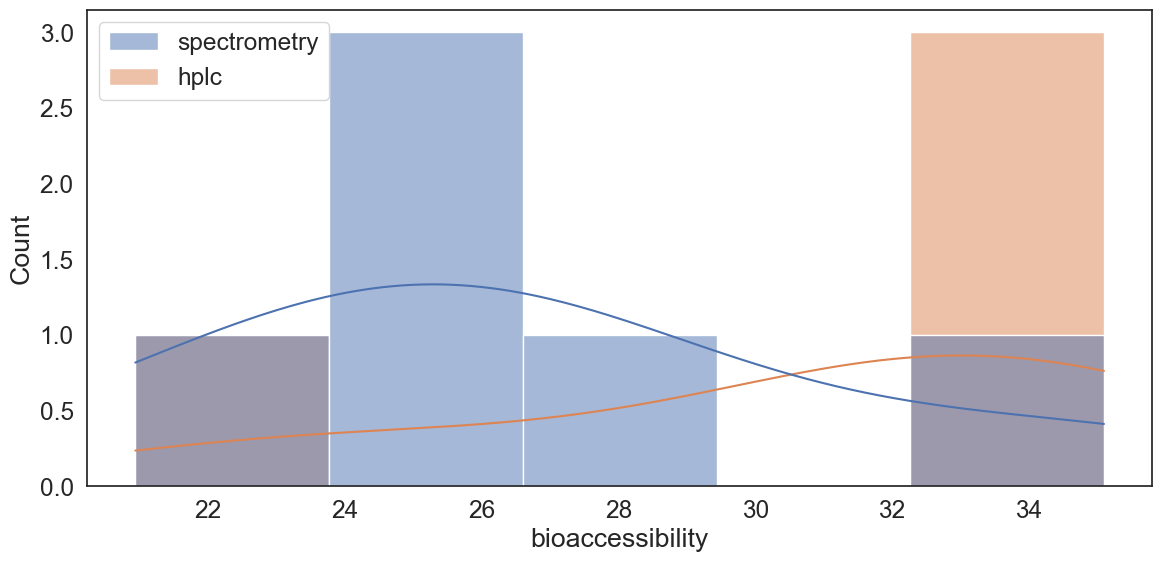

specmean
44.743994487500004
2.6813948142069224
0.9485811591148376
samplemean
45.6225
5.724396802284062
0.9542794823646545
RanksumsResult(statistic=-0.5095246653650681, pvalue=0.610384513874678)
Ttest_indResult(statistic=-0.3303429449443029, pvalue=0.747957473527481)


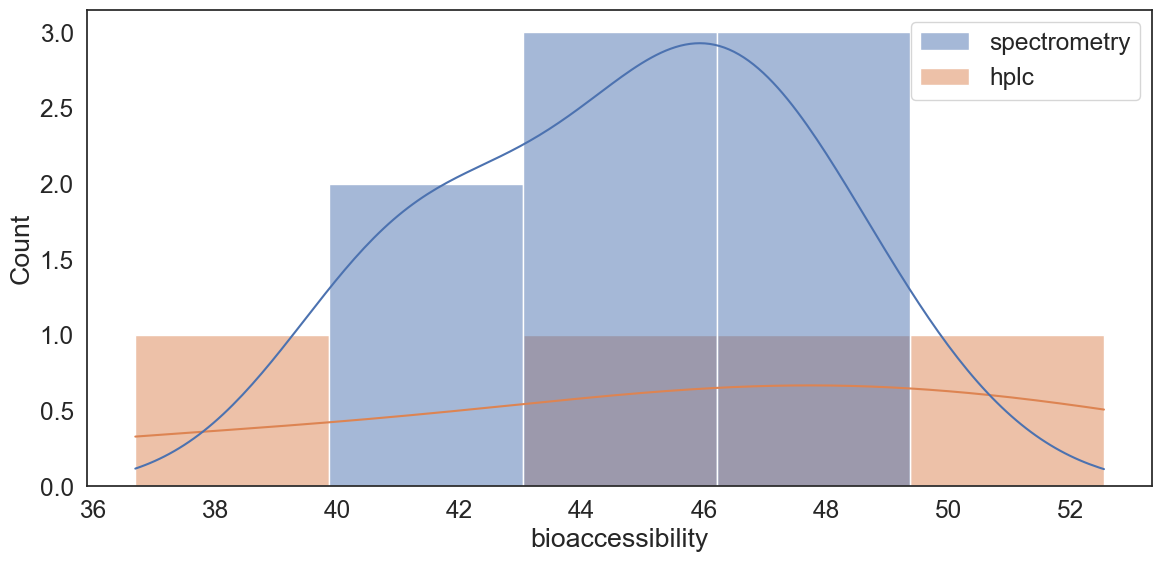

specmean
37.01500450214286
9.586307716090948
0.8748311996459961
samplemean
38.24125
8.947409453998402
0.9528607130050659
kolmogorov
KstestResult(statistic=0.23214285714285715, pvalue=0.8952716014635519, statistic_location=28.85346218, statistic_sign=1)
Ttest_indResult(statistic=-0.2818694267657179, pvalue=0.7809396283867024)
MannwhitneyuResult(statistic=52.0, pvalue=0.8154048222159678)
14
8


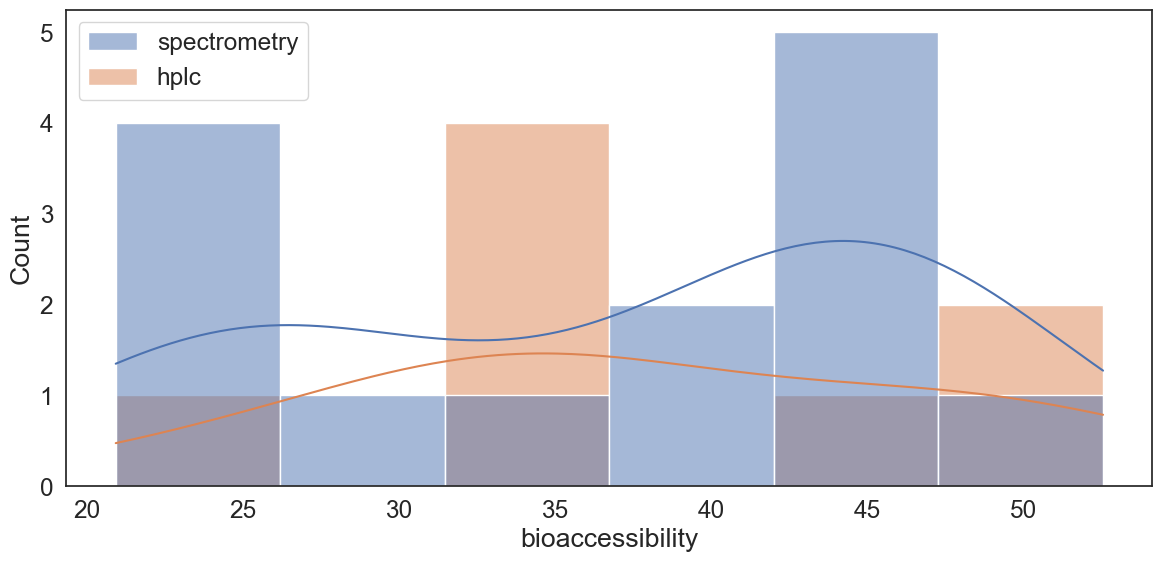

In [33]:
# found at HPLC.xlsx
hplcBiscObs=[36.70,52.54,47.52,45.73]
hplcCustObs=[23.70,35.10,32.27,32.37]

# fetched from dfData
spectCustObs=dfData[(dfData['Supplement']=='non-supplemented') & (dfData['Water']>0.5)]['bioaccessibility'].to_list()
spectBiscObs=dfData[(dfData['Supplement']=='non-supplemented') & (dfData['Water']<0.5)]['bioaccessibility'].to_list()

# perform Wilcoxon rank-sum statistic for two samples custards
from scipy.stats import ranksums
print('specmean')
print(np.mean(spectCustObs))
print(np.std(spectCustObs))
print(stats.shapiro(spectCustObs).statistic)
print('samplemean')
print(np.mean(hplcCustObs))
print(np.std(hplcCustObs))
print(stats.shapiro(hplcCustObs).statistic)
print(ranksums(spectCustObs,hplcCustObs))
print(scipy.stats.ttest_ind(spectCustObs,hplcCustObs))
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data={'spectrometry':spectCustObs,'hplc':hplcCustObs},color='crimson', fill=True,element='bars',kde=True,ax=ax)
ax.set_xlabel('bioaccessibility')
plt.tight_layout()
plt.show()


# perform Wilcoxon rank-sum statistic for two samples biscuits
print('specmean')
print(np.mean(spectBiscObs))
print(np.std(spectBiscObs))
print(stats.shapiro(spectBiscObs).statistic)
print('samplemean')
print(np.mean(hplcBiscObs))
print(np.std(hplcBiscObs))
print(stats.shapiro(hplcBiscObs).statistic)
print(ranksums(spectBiscObs,hplcBiscObs))
print(scipy.stats.ttest_ind(spectBiscObs,hplcBiscObs))
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data={'spectrometry':spectBiscObs,'hplc':hplcBiscObs},color='crimson', fill=True,element='bars',kde=True,ax=ax)
ax.set_xlabel('bioaccessibility')
plt.tight_layout()
plt.show()

# perform Wilcoxon rank-sum statistic for two samples all
allSpec=spectBiscObs+spectCustObs
allHPLC=hplcBiscObs+hplcCustObs
print('specmean')
print(np.mean(allSpec))
print(np.std(allSpec))
print(stats.shapiro(allSpec).statistic)
print('samplemean')
print(np.mean(allHPLC))
print(np.std(allHPLC))
print(stats.shapiro(allHPLC).statistic)
print('kolmogorov')
print(scipy.stats.kstest(allSpec,allHPLC))
print(scipy.stats.ttest_ind(allSpec,allHPLC))
print(scipy.stats.mannwhitneyu(allSpec,allHPLC))
print(len(allSpec))
print(len(allHPLC))
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data={'spectrometry':allSpec,'hplc':allHPLC},color='crimson', fill=True,element='bars',kde=True,ax=ax)
ax.set_xlabel('bioaccessibility')
plt.tight_layout()
plt.show()


In [74]:
dfData=pd.read_csv('../data.csv',index_col='index')
#macronutrient content and other columns
dfData.loc[dfData['type']==1,'texture']=dfData['Biscuit_hardness'].loc[dfData['type']==1]
dfData.loc[dfData['type']==2,'texture']=dfData['Custard_viscosity'].loc[dfData['type']==2]
dfData.loc[dfData['type']==3,'texture']=0
dfData['MacronutrientContent']=dfData['Protein']+dfData['Carbs']+dfData['Fat']
dfData['Total_fibre']=dfData['Soluble_fibre']+dfData['Insoluble_fibre']

Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00018 KaroPRO SG biscuit
FST 00018 KaroPRO SG biscuit
FST 00018 KaroPRO SG bis

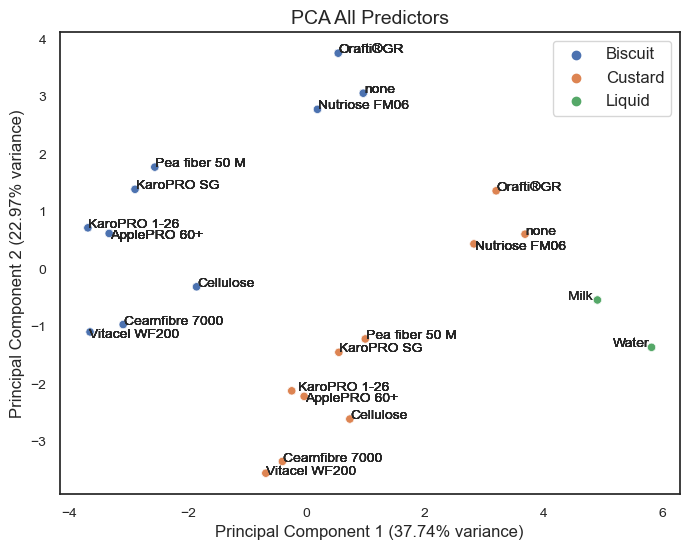

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#revisions requested PCA
dfData=pd.read_csv('../data.csv',index_col='index')
dfData.reset_index(drop=True,inplace=True)
#macronutrient content and other columns
dfData.loc[dfData['type']==1,'texture']=dfData['Biscuit_hardness'].loc[dfData['type']==1]
dfData.loc[dfData['type']==2,'texture']=dfData['Custard_viscosity'].loc[dfData['type']==2]
dfData.loc[dfData['type']==3,'texture']=0
dfData['MacronutrientContent']=dfData['Protein']+dfData['Carbs']+dfData['Fat']
dfData['Total_fibre']=dfData['Soluble_fibre']+dfData['Insoluble_fibre']
#scale
scaler = StandardScaler()
numericCols=dfData.select_dtypes(include=np.number).columns.tolist()
predictiveCols=['Oil_retention', 'Water_retention','Curcumin_binding_capacity','Particle_size',
              'Cellulose', 'Hemicellulose',  'Pectin', 'Lignin', 'Fructans','Insoluble_fibre',
       'Soluble_fibre', 'Protein','Fat','Carbs','Water','Ash','MacronutrientContent','Total_fibre']
numericCols.remove('bioaccessibility')
scaled_data = scaler.fit_transform(dfData[predictiveCols])
#['MacronutrientContent','Hemicellulose','Soluble_fibre','texture']
# Perform PCA
pca = PCA(n_components=2)  # Here we reduce the data to 2 dimensions
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['type'] = dfData['type']
pca_df['Supplement'] = dfData['Supplement']
pca_df.loc[pca_df['type']==1,'Label'] = pca_df['Supplement']+' biscuit'
pca_df.loc[pca_df['type']==2,'Label'] = pca_df['Supplement']+' custard'
pca_df.loc[pca_df['type']==3,'Label'] = pca_df['Supplement']
pca_df.loc[pca_df['type']==1,'type']='Biscuit'
pca_df.loc[pca_df['type']==2,'type']='Custard'
pca_df.loc[pca_df['type']==3,'type']='Liquid'


# Plot the PCA results
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='type')

# Annotate each point with its label
# positioning dictionaries for results plot
positionsDict={'FST 00224 ApplePRO 60+ biscuit': {'x': 0, 'y': -0.1, 'label': 'ApplePRO 60+'},
 'FST 00224 ApplePRO 60+ custard': {'x': 0, 'y': -0.1, 'label': 'ApplePRO 60+'},
 'Ceamfibre 7000 biscuit': {'x': 0, 'y': 0, 'label':'Ceamfibre 7000'},
 'Ceamfibre 7000 custard': {'x': 0, 'y': 0, 'label':'Ceamfibre 7000'},
 'Microcrystalline cellulose biscuit': {'x': 0, 'y': 0, 'label': 'Cellulose'},
 'Microcrystalline cellulose custard': {'x': 0, 'y': 0, 'label': 'Cellulose'},
 'Inulin (Orafti®GR) biscuit': {'x': 0, 'y': 0, 'label': 'Orafti®GR'},
 'Inulin (Orafti®GR) custard': {'x': 0, 'y': 0, 'label': 'Orafti®GR'},
 'FST 00007 KaroPRO 1-26 biscuit': {'x': 0, 'y': 0, 'label': 'KaroPRO 1-26'},
 'FST 00007 KaroPRO 1-26 custard': {'x': 0.1, 'y': 0, 'label': 'KaroPRO 1-26'},
 'FST 00018 KaroPRO SG biscuit': {'x': 0, 'y': 0, 'label': 'KaroPRO SG'},
 'FST 00018 KaroPRO SG custard': {'x': 0, 'y': 0, 'label': 'KaroPRO SG'},
 'Nutriose FM06 biscuit': {'x': 0, 'y': 0, 'label':'Nutriose FM06'},
 'Nutriose FM06 custard': {'x': 0, 'y': -0.1, 'label':'Nutriose FM06'},
 'Pea fiber 50 M biscuit': {'x': 0, 'y': 0, 'label':'Pea fiber 50 M'},
 'Pea fiber 50 M custard': {'x': 0, 'y': 0, 'label':'Pea fiber 50 M'},
 'Vitacel WF200 biscuit': {'x': -0.02, 'y': -0.1, 'label':'Vitacel WF200'},
 'Vitacel WF200 custard': {'x': 0, 'y': -0.03, 'label':'Vitacel WF200'},
 'milk': {'x': -0.50, 'y': 0, 'label': 'Milk'},
 'non-supplemented biscuit': {'x': 0, 'y': 0, 'label': 'none'},
 'non-supplemented custard': {'x': 0, 'y': -0.02, 'label': 'none'},
 'water': {'x': -0.66, 'y': 0, 'label': 'Water'}}
for i in range(pca_df.shape[0]):
    print(pca_df['Label'][i])
    plot.text(pca_df['PC1'][i]+0.01+positionsDict[pca_df['Label'][i]]['x'], pca_df['PC2'][i]+positionsDict[pca_df['Label'][i]]['y'], positionsDict[pca_df['Label'][i]]['label'], 
              horizontalalignment='left', fontname='Arial',fontsize=10)

plt.title('PCA All Predictors', fontname='Arial', fontsize=14)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)', fontname='Arial', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)', fontname='Arial', fontsize=12)

plt.xticks(fontname='Arial', fontsize=10)
plt.yticks(fontname='Arial', fontsize=10)
plt.legend(title=None, loc='best', fontsize=12, prop={'family': 'Arial'})
plt.savefig('pcaFull.png', dpi=600, bbox_inches="tight")

Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Inulin (Orafti®GR) biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
Microcrystalline cellulose biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00224 ApplePRO 60+ biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00007 KaroPRO 1-26 biscuit
FST 00018 KaroPRO SG biscuit
FST 00018 KaroPRO SG biscuit
FST 00018 KaroPRO SG bis

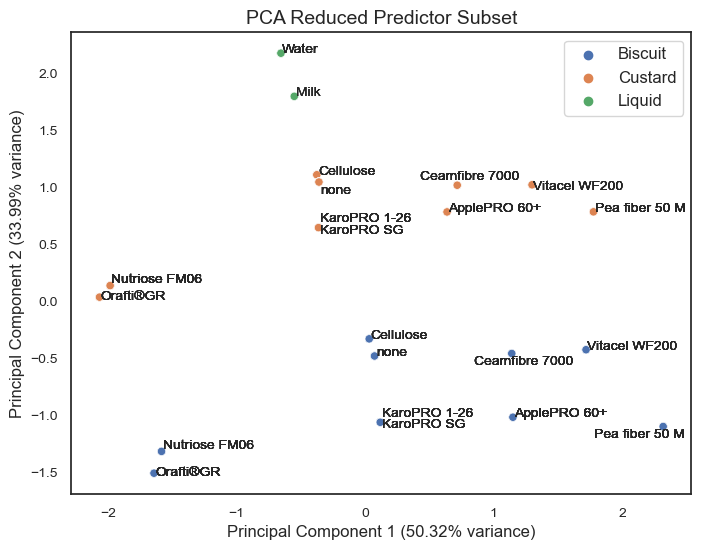

In [189]:
scaled_data = scaler.fit_transform(dfData[['MacronutrientContent','Hemicellulose','Soluble_fibre']])

# Perform PCA
pca = PCA(n_components=2)  # Here we reduce the data to 2 dimensions
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['type'] = dfData['type']
pca_df['Supplement'] = dfData['Supplement']
pca_df.loc[pca_df['type']==1,'Label'] = pca_df['Supplement']+' biscuit'
pca_df.loc[pca_df['type']==2,'Label'] = pca_df['Supplement']+' custard'
pca_df.loc[pca_df['type']==3,'Label'] = pca_df['Supplement']
pca_df.loc[pca_df['type']==1,'type']='Biscuit'
pca_df.loc[pca_df['type']==2,'type']='Custard'
pca_df.loc[pca_df['type']==3,'type']='Liquid'


# Plot the PCA results
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='type')

# Annotate each point with its label
# positioning dictionaries for results plot
positionsDict={'FST 00224 ApplePRO 60+ biscuit': {'x': 0, 'y': 0, 'label': 'ApplePRO 60+'},
 'FST 00224 ApplePRO 60+ custard': {'x': 0, 'y': 0, 'label': 'ApplePRO 60+'},
 'Ceamfibre 7000 biscuit': {'x': -0.3, 'y': -0.1, 'label':'Ceamfibre 7000'},
 'Ceamfibre 7000 custard': {'x': -0.3, 'y': 0.05, 'label':'Ceamfibre 7000'},
 'Microcrystalline cellulose biscuit': {'x': 0, 'y': 0, 'label': 'Cellulose'},
 'Microcrystalline cellulose custard': {'x': 0, 'y': 0, 'label': 'Cellulose'},
 'Inulin (Orafti®GR) biscuit': {'x': 0, 'y': -0.02, 'label': 'Orafti®GR'},
 'Inulin (Orafti®GR) custard': {'x': 0, 'y': -0.02, 'label': 'Orafti®GR'},
 'FST 00007 KaroPRO 1-26 biscuit': {'x': 0, 'y': 0.05, 'label': 'KaroPRO 1-26'},
 'FST 00007 KaroPRO 1-26 custard': {'x': 0, 'y': 0.05, 'label': 'KaroPRO 1-26'},
 'FST 00018 KaroPRO SG biscuit': {'x': 0, 'y': -0.05, 'label': 'KaroPRO SG'},
 'FST 00018 KaroPRO SG custard': {'x': 0, 'y': -0.05, 'label': 'KaroPRO SG'},
 'Nutriose FM06 biscuit': {'x': 0, 'y': 0.02, 'label':'Nutriose FM06'},
 'Nutriose FM06 custard': {'x': 0, 'y': 0.02, 'label':'Nutriose FM06'},
 'Pea fiber 50 M biscuit': {'x': -0.55, 'y': -0.1, 'label':'Pea fiber 50 M'},
 'Pea fiber 50 M custard': {'x': 0, 'y': 0, 'label':'Pea fiber 50 M'},
 'Vitacel WF200 biscuit': {'x': 0, 'y': 0, 'label':'Vitacel WF200'},
 'Vitacel WF200 custard': {'x': 0, 'y': -0.04, 'label':'Vitacel WF200'},
 'milk': {'x': 0, 'y': 0, 'label': 'Milk'},
 'non-supplemented biscuit': {'x': 0, 'y': 0, 'label': 'none'},
 'non-supplemented custard': {'x': 0, 'y': -0.1, 'label': 'none'},
 'water': {'x': 0, 'y': 0, 'label': 'Water'}}
for i in range(pca_df.shape[0]):
    print(pca_df['Label'][i])
    plot.text(pca_df['PC1'][i]+0.01+positionsDict[pca_df['Label'][i]]['x'], pca_df['PC2'][i]+positionsDict[pca_df['Label'][i]]['y'], positionsDict[pca_df['Label'][i]]['label'], 
              horizontalalignment='left', fontname='Arial',fontsize=10)

plt.title('PCA Reduced Predictor Subset', fontname='Arial', fontsize=14)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)', fontname='Arial', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)', fontname='Arial', fontsize=12)

plt.xticks(fontname='Arial', fontsize=10)
plt.yticks(fontname='Arial', fontsize=10)
plt.legend(title=None, loc='best', fontsize=12, prop={'family': 'Arial'})
plt.savefig('pcaReduced.png', dpi=600, bbox_inches="tight")